# Comparing Sorting Algorithms

## Sorting Lists
- BubbleSort
- InsertionSort
- SelectionSort
- QuickSort
- MergeSort
- Built_in Sorting

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [6]:
def bubbleSort(data):
    for i in range(len(data)-1):
        swap=False
        for j in range(len(data)-i-1):
            if data[j]>data[j+1] :
                data[j+1],data[j]=data[j],data[j+1]
                swap=True
        if swap==False:
            break
    return data

In [7]:
def insertionSort(data):
    for i in range(len(data)):
        key=data[i]
        j=i-1
        while j>=0 : 
            if key<data[j]:
                data[j+1]=data[j]
                j-=1
            else: 
                break
        data[j+1]=key
    return data

In [8]:
def selectionSort(data):
    for i in range(len(data)-1):
        lowest=i
        for j in range(i+1,len(data)):
            if data[lowest]>data[j]:
                lowest=j
        data[lowest],data[i]=data[i],data[lowest]
    return data

In [9]:
def partition(data,low,high):
    if low<high:
        key=data[low]
        i=low
        j=low+1
        while j<=high:
            if data[j]<key:
                i+=1
                data[j],data[i]=data[i],data[j]
            j+=1
        data[i],data[low]=data[low],data[i]
        return i

def quickSort(data,low,high):
    if(low<high):
        pivot=partition(data,low,high)
        quickSort(data,low,pivot-1)
        quickSort(data,pivot+1,high)
    return data

In [10]:
def quickSort_python(data):
    if len(data) <=1 : 
        return data
    pivot=data[0]
    pivot_left=[x for x in data[1:] if x<pivot ]
    pivot_right=[x for x in data[1:] if x>=pivot ]
    return quickSort_python(pivot_left) + [pivot] + quickSort_python(pivot_right)

In [11]:
def merge(left,right):
    left_index,right_index=0,0
    merged=list()
    while left_index<len(left) and right_index<len(right):
        if left[left_index]<right[right_index]:
            merged.append(left[left_index])
            left_index+=1
        else:
            merged.append(right[right_index])
            right_index+=1
    while left_index<len(left):
        merged.append(left[left_index])
        left_index+=1
    while right_index<len(right):
        merged.append(right[right_index])
        right_index+=1
    return merged
            
def mergeSort(data):
    if len(data)<=1:
        return data
    medium=len(data)//2
    left=mergeSort(data[:medium])
    right=mergeSort(data[medium:])
    return merge(left,right)

In [12]:
class Heap:
    def __init__(self,data):
        self.heap=list()
        self.heap.append(None)
        self.heap.append(data)
        self.heapSize=1

    def insert(self,data):
        self.heapSize+=1
        child=self.heapSize
        self.heap.append(data)
        parent=child//2
        while(parent>=1 and data <= self.heap[parent]):
            self.heap[child]=self.heap[parent]
            child=parent
            parent=child//2
        self.heap[child]=data

    def siftdown(self,index):
        parent=index
        key=self.heap[index]
        while(parent*2 <= self.heapSize):
            largerChild=parent*2
            if parent*2 < self.heapSize and self.heap[parent*2] >= self.heap[parent*2+1]:
                largerChild=parent*2+1
            if key<=self.heap[largerChild]:
                break
            self.heap[parent]=self.heap[largerChild]
            parent=largerChild
        self.heap[parent]=key

    def delete(self):
        item=self.heap[1]
        self.heap[1]=self.heap[self.heapSize]
        self.heapSize-=1
        self.siftdown(1)
        del self.heap[self.heapSize+1]
        return item
    
    def isEmpty(self):
        if self.heapSize <=0:
            return True
        return False 
        
    def makeHeap(self,data):
        self.heap.extend(data)
        self.heapSize=len(data)
        for i in range(self.heapSize//2,0,-1):
            self.siftdown(i)
        
    def heapSort(self):
        sorted_data=list()
        while not self.isEmpty():
            sorted_data.append(self.delete())
        return sorted_data
            
def heapSort(data):
    heap=Heap(data[0])
    heap.makeHeap(data[1:])
    return heap.heapSort()

In [4]:
import sys
print(sys.getrecursionlimit())

3000


RecursionError: maximum recursion depth exceeded in comparison

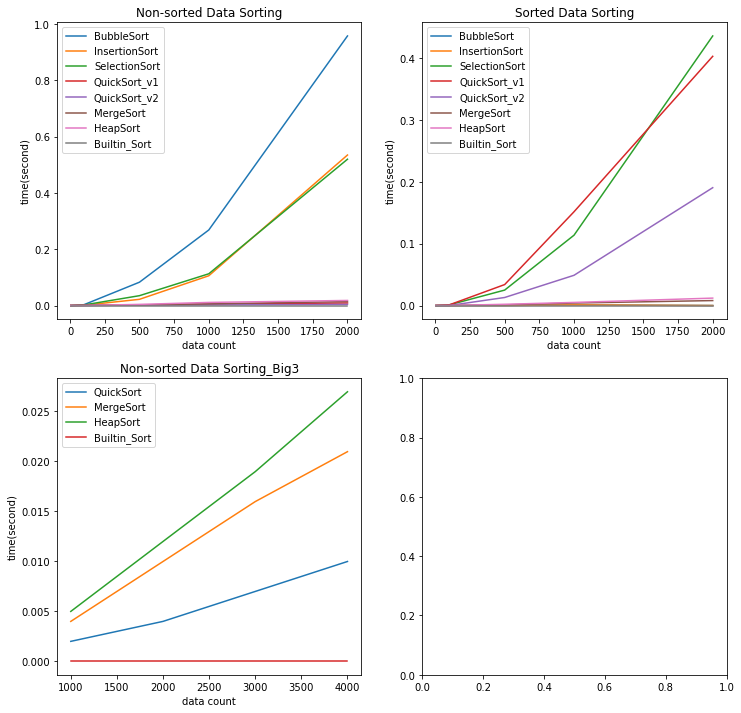

In [14]:
X_range=[5,10,100,500,1000,2000]
def TimeComplexity(X_range,Sorting_Method,option_sort):
    times=[]
    for i in X_range:
        if option_sort==False:
            np.random.seed(i)
            data= np.random.randint(0,1000,size=i)
        else :
            data=np.arange(i)

        start=time.time()
        if Sorting_Method == None:
            data=data.sort()
        elif Sorting_Method== quickSort:
            quickSort(data,0,len(data)-1)
                
        else:
            data=Sorting_Method(data)
        times.append(time.time()-start)
    return times
plt.figure(figsize=(12,12))

#정렬 되어있지 않은 데이터에 대한 시간 복잡도
plt.subplot(2,2,1)
plt.plot(X_range,TimeComplexity(X_range,bubbleSort,option_sort=False),label="BubbleSort")
plt.plot(X_range,TimeComplexity(X_range,insertionSort,option_sort=False),label="InsertionSort")
plt.plot(X_range,TimeComplexity(X_range,selectionSort,option_sort=False),label="SelectionSort")
plt.plot(X_range,TimeComplexity(X_range,quickSort,option_sort=False),label="QuickSort_v1")
plt.plot(X_range,TimeComplexity(X_range,quickSort_python,option_sort=False),label="QuickSort_v2")
plt.plot(X_range,TimeComplexity(X_range,mergeSort,option_sort=False),label="MergeSort")
plt.plot(X_range,TimeComplexity(X_range,heapSort,option_sort=False),label="HeapSort")
plt.plot(X_range,TimeComplexity(X_range,None,option_sort=False),label="Builtin_Sort")
plt.title('Non-sorted Data Sorting')
plt.xlabel('data count')
plt.ylabel('time(second)')
plt.legend()
#정렬 되어있는 데이터에 대한 시간 복잡도
plt.subplot(2,2,2)
plt.plot(X_range,TimeComplexity(X_range,bubbleSort,option_sort=True),label="BubbleSort")
plt.plot(X_range,TimeComplexity(X_range,insertionSort,option_sort=True),label="InsertionSort")
plt.plot(X_range,TimeComplexity(X_range,selectionSort,option_sort=True),label="SelectionSort")
plt.plot(X_range,TimeComplexity(X_range,quickSort,option_sort=True),label="QuickSort_v1")
plt.plot(X_range,TimeComplexity(X_range,quickSort_python,option_sort=True),label="QuickSort_v2")
plt.plot(X_range,TimeComplexity(X_range,mergeSort,option_sort=True),label="MergeSort")
plt.plot(X_range,TimeComplexity(X_range,heapSort,option_sort=True),label="HeapSort")
plt.plot(X_range,TimeComplexity(X_range,None,option_sort=True),label="Builtin_Sort")
plt.title('Sorted Data Sorting')
plt.xlabel('data count')
plt.ylabel('time(second)')
plt.legend()

X_range=np.arange(1000,5000,1000)
#빠른 정렬 기법에 대한 비교  -> 큰 데이터를 정렬
plt.subplot(2,2,3)
plt.plot(X_range,TimeComplexity(X_range,quickSort_python,option_sort=False),label="QuickSort")
plt.plot(X_range,TimeComplexity(X_range,mergeSort,option_sort=False),label="MergeSort")
plt.plot(X_range,TimeComplexity(X_range,heapSort,option_sort=False),label="HeapSort")
plt.plot(X_range,TimeComplexity(X_range,None,option_sort=False),label="Builtin_Sort")
plt.title('Non-sorted Data Sorting_Big3')
plt.xlabel('data count')
plt.ylabel('time(second)')
plt.legend()

plt.subplot(2,2,4)
plt.plot(X_range,TimeComplexity(X_range,quickSort_python,option_sort=True),label="QuickSort")
plt.plot(X_range,TimeComplexity(X_range,mergeSort,option_sort=True),label="MergeSort")
plt.plot(X_range,TimeComplexity(X_range,heapSort,option_sort=True),label="HeapSort")
plt.plot(X_range,TimeComplexity(X_range,None,option_sort=True),label="Builtin_Sort")
plt.xlabel('')
plt.title('Sorted Data Sorting_Big3')
plt.xlabel('data count')
plt.ylabel('time(second)')
plt.legend()
plt.show()

In [ ]:
#as you can see int the 4th plot
#sorting sorted array with quicksort is a terrible idea 